In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

**NOTA:** antes de correr las siguientes líneas de código, subir el fichero kaggle.json para establecer la conexión correctamente y descargar los csv correspondientes

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
!kaggle competitions download -c udea-ai4eng-20241

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
ds = pd.read_csv('train.csv')
ds = ds.copy()

Shows dataframe without changes:

In [ ]:
display(ds)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo


Shows NaN data quantity for each column before they were deleted:

In [ ]:
for i in range (0, len(col)):
  print("missing data in column", col[i], ": ", sum(ds[col[i]].isna()))
  print("------------------------------------------------------------------")

missing data in column PERIODO :  0
------------------------------------------------------------------
missing data in column ESTU_PRGM_ACADEMICO :  0
------------------------------------------------------------------
missing data in column ESTU_PRGM_DEPARTAMENTO :  0
------------------------------------------------------------------
missing data in column ESTU_VALORMATRICULAUNIVERSIDAD :  6287
------------------------------------------------------------------
missing data in column ESTU_HORASSEMANATRABAJA :  30857
------------------------------------------------------------------
missing data in column FAMI_ESTRATOVIVIENDA :  32137
------------------------------------------------------------------
missing data in column FAMI_TIENEINTERNET :  26629
------------------------------------------------------------------
missing data in column FAMI_EDUCACIONPADRE :  23178
------------------------------------------------------------------
missing data in column ESTU_PAGOMATRICULAPROPIO :  6498

Drop useless columns:

In [ ]:
columns_drop = ['ID', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEINTERNET.1', 'ESTU_PRIVADO_LIBERTAD']
ds = ds.drop(columns_drop, axis = 1)

Save current columns:

In [ ]:
col = ds.columns
print(col)

Index(['PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL'],
      dtype='object')


Drop rows containing any null values:

In [ ]:
# Evalúa si cada columna tiene algún valor nulo y la elimina

def drop_null_rows(ds):
  df = ds.dropna()
  return df

df = drop_null_rows(ds)

Shows NaN data quantity for each column after ther were deleted:

In [ ]:
for i in range (0, len(col)):
  print("missing data in column", col[i], ": ", sum(df[col[i]].isna()))
  print("------------------------------------------------------------------")

missing data in column PERIODO :  0
------------------------------------------------------------------
missing data in column ESTU_PRGM_ACADEMICO :  0
------------------------------------------------------------------
missing data in column ESTU_PRGM_DEPARTAMENTO :  0
------------------------------------------------------------------
missing data in column ESTU_VALORMATRICULAUNIVERSIDAD :  0
------------------------------------------------------------------
missing data in column ESTU_HORASSEMANATRABAJA :  0
------------------------------------------------------------------
missing data in column FAMI_ESTRATOVIVIENDA :  0
------------------------------------------------------------------
missing data in column FAMI_TIENEINTERNET :  0
------------------------------------------------------------------
missing data in column FAMI_EDUCACIONPADRE :  0
------------------------------------------------------------------
missing data in column ESTU_PAGOMATRICULAPROPIO :  0
---------------------

Shows dataframe with changes applied:

In [ ]:
display(df)

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,No,Si,Postgrado,medio-alto
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,No,Si,Técnica o tecnológica incompleta,bajo
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,No,No,Secundaria (Bachillerato) completa,bajo
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,No,Si,Secundaria (Bachillerato) completa,alto
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,No,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,No,Si,Secundaria (Bachillerato) incompleta,bajo
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Si,Si,Primaria completa,bajo


One-hot convertion for each column:

In [ ]:
def one_hot(df, column):
    # Obtener las columnas categóricas
    columnas_categoricas = column
    # Aplicar codificación one-hot a las columnas categóricas
    df_codificado = pd.get_dummies(df, columns=columnas_categoricas)

    # Calcular el recuento de cada tipo en cada columna categórica
    recuento = {}
    for col in columnas_categoricas:
        recuento[col] = df[col].value_counts()

    return df_codificado, recuento
df_codificado,recuento = one_hot(df, col)
#cambia el corchete por el nombre de la columna que necesita

Shows some counts:

In [ ]:
print(recuento['ESTU_VALORMATRICULAUNIVERSIDAD'])

ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      189270
Entre 2.5 millones y menos de 4 millones    118216
Menos de 500 mil                             73051
Entre 500 mil y menos de 1 millón            72696
Entre 4 millones y menos de 5.5 millones     65022
Más de 7 millones                            63827
Entre 5.5 millones y menos de 7 millones     35850
No pagó matrícula                            17804
Name: count, dtype: int64


In [ ]:
print(recuento['ESTU_HORASSEMANATRABAJA'])

ESTU_HORASSEMANATRABAJA
Más de 30 horas        240060
0                      112086
Entre 11 y 20 horas    111162
Entre 21 y 30 horas     88946
Menos de 10 horas       83482
Name: count, dtype: int64


Distribution of worked hours pie chart creation:

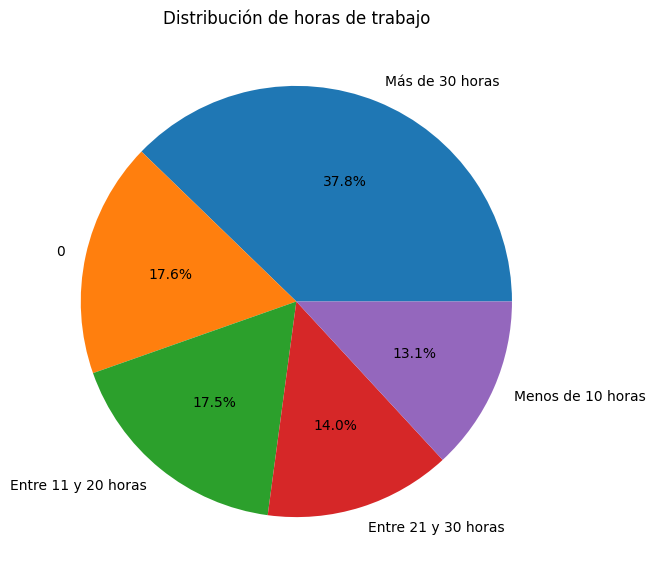

In [ ]:
# Primero, necesitamos el conteo de cada categoría
conteo_rendimiento = df['ESTU_HORASSEMANATRABAJA'].value_counts()

# Crear la gráfica circular
plt.figure(figsize=(10, 7)) # tamaño de la figura, puedes ajustarlo según tus necesidades
plt.pie(conteo_rendimiento, labels = conteo_rendimiento.index, autopct='%1.1f%%') # autopct para mostrar porcentajes
plt.title('Distribución de horas de trabajo') # cambia 'Rendimiento' por el nombre de la columna
plt.show()